In [1]:
import pandas as pd

import distributions
import pacing
import simulation

In [2]:
windows = 24 * 60
requests = 2_000_000

dist = distributions.traffic_dist(distributions.custom_dist(windows), requests)
camp = [pacing.Campaign(1, 1_000_000, 1), pacing.Campaign(2, 2_000_000, 2)]
pace = pacing.Pacing()
# pace = pacing.ThrottledPacing(dist)
proc = pacing.AdServer(pace, camp)

In [3]:
sim = simulation.Simulation(dist, proc)

In [4]:
df = pd.DataFrame(e.to_dict() for e in sim.run())

In [5]:
budget_df = df[df["kind"] == "win"].set_index(["request", "campaign_id"]).unstack()["bid_value"].fillna(0)

In [6]:
budget_df

campaign_id,2.0
request,
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
999995,2.0
999996,2.0
999997,2.0


In [7]:
budget_sums = budget_df.sum()

In [8]:
budget_sums

campaign_id
2.0    2000000.0
dtype: float64

<AxesSubplot:xlabel='request'>

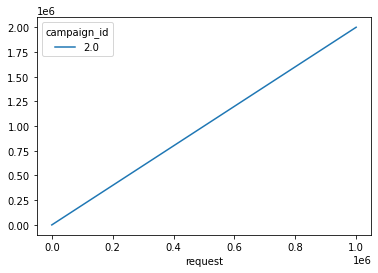

In [9]:
budget_df.cumsum().plot()

<AxesSubplot:>

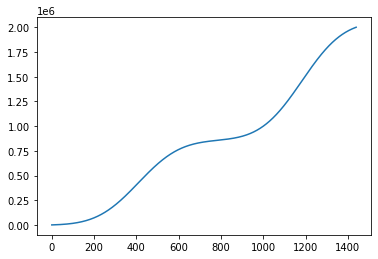

In [10]:
pd.Series(dist.cumsum()).plot()